<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/W9_ANN_Cifar10_31_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Chuyển đổi các nhãn ở đầu ra thành định dạng one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Chuẩn hóa dữ liệu
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [5]:
#-----------------------------Tạo 2 lớp trong mô hình ANN---------------------------------
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (3072,))) # Lớp đầu tiên

In [6]:
# Lớp thứ 2
model.add(Dense(10,activation = 'Softmax')) # Lớp thứ 2, Liên kết với lớp trước đó, sẽ có 10 output ở ngõ ra

In [7]:
# Biên dịch chương trình
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy']) # Có thể sử dụng optimizer rmsprop hoặc Adam đều được. Nhưng đối với dữ liệu nhiều chiều thì Adam sẽ cho kết quả tốt hơn


In [8]:
# Bắt đầu huấn luyện
model.fit(x_train, y_train, epochs = 10, batch_size = 128)

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/10
391/391 [==============================] - 15s 35ms/step - loss: 1.9466 - accuracy: 0.3184
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 1.7187 - accuracy: 0.3884
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 1.6387 - accuracy: 0.4194
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 1.5941 - accuracy: 0.4352
Epoch 5/10
391/391 [==============================] - 14s 37ms/step - loss: 1.5513 - accuracy: 0.4512
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5297 - accuracy: 0.4601
Epoch 7/10
391/391 [==============================] - 16s 41ms/step - loss: 1.5102 - accuracy: 0.4637
Epoch 8/10
391/391 [==============================] - 17s 42ms/step - loss: 1.4775 - accuracy: 0.4763
Epoch 9/10
391/391 [==============================] - 13s 34ms/step - loss: 1.4654 - accuracy: 0.4805
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - loss: 1.5412

1/1 [==============================] - 0s 50ms/step


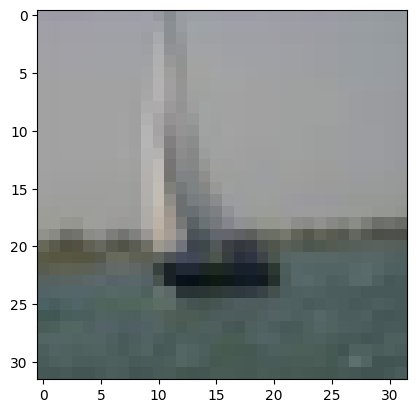

Label:  Tàu thủy
(1, 3072)


In [42]:
# Test mô hình
X = x_test
y = y_test

i = 55 #Test hình thứ i
img = X[i].reshape(1, 32*32*3)
matrix = np.argmax(model.predict(img), axis=-1)
plt.imshow(X[i].reshape(32,32,3))
plt.show()
class_names = ["Máy bay", "Ô tô", "Chim", "Mèo", "Nai", "Chó", "Ếch", "Ngựa", "Tàu thủy", "Xe tải"]
temp1 = matrix[0]
print("Label: ", class_names[temp1])


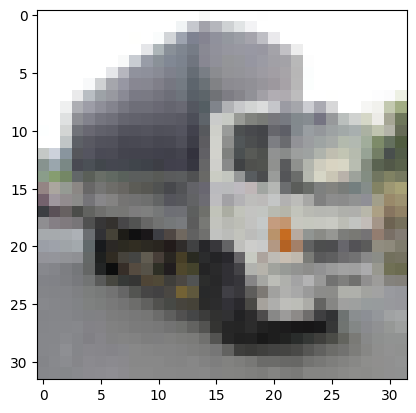

1/1 [==============================] - 0s 40ms/step
9
Label:  Xe tải


In [55]:
from PIL import Image

# Mở ảnh
img = Image.open('xetai.jpg')

# Resize ảnh về kích thước mong muốn
img = img.resize((32, 32))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32') / 255.0

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)

class_names = ["Máy bay", "Ô tô", "Chim", "Mèo", "Nai", "Chó", "Ếch", "Ngựa", "Tàu thủy", "Xe tải"]
temp1 = matrix[0]
print(temp1)
print("Label: ", class_names[temp1])